# What is Model Context Protocol?

The Model Context Protocol (MCP) is an open standard developed by Anthropic to enable easy and standardized integration between AI models and external tools. It acts as a universal connector, allowing large language models (LLMs) to interact dynamically with APIs, databases, and business applications.

Originally built to improve Claude’s ability to interact with external systems, Anthropic decided to open-source MCP in early 2024 to encourage industry-wide adoption. By making MCP publicly available, they aimed to create a standardized framework for AI-to-tool communication, reducing reliance on proprietary integrations and enabling greater modularity and interoperability across AI applications.

MCP follows a client-server architecture where:

- MCP clients (e.g., Claude Desktop) request information and execute tasks.
- MCP servers provide access to external tools and data sources.
- Host applications use MCP to communicate between models and tools.

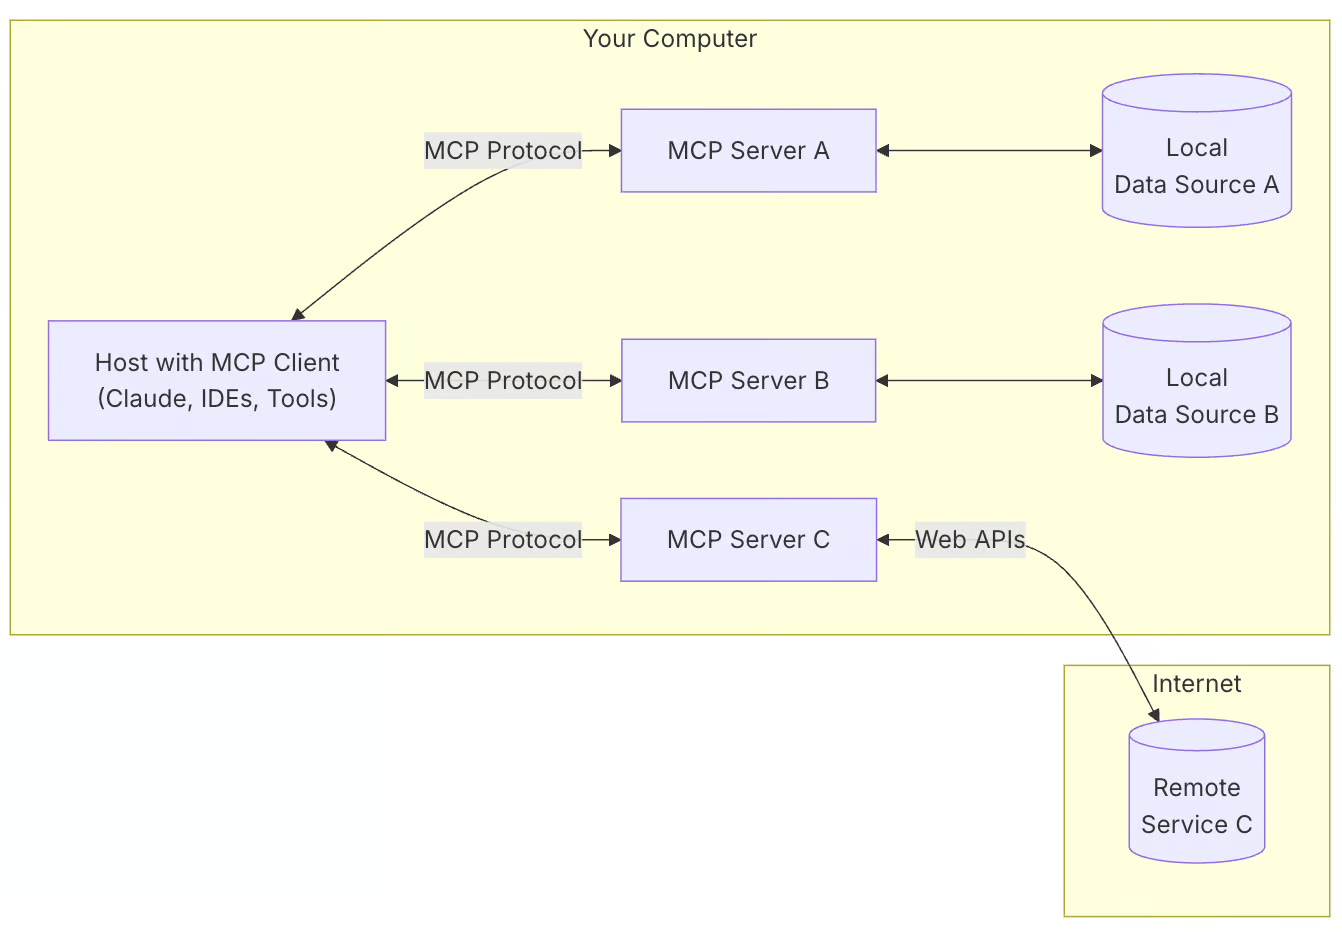

*Source: MCP Team*

Here's a simple analogy I liked:

MCP is like a USB-C port for AI applications. Just as USB-C provides a standard way to connect various devices (phones, laptops, cameras) to different peripherals (chargers, monitors, storage), MCP provides a standard protocol that lets AI models connect to various data sources and tools.

# The Problem MCP Solves
Imagine you have a powerful AI assistant that can help with coding, data analysis, or customer support. Now imagine that assistant is locked in a room – it's smart but has no direct access to your databases, files, or tools. If you want it to use some information, you have to manually hand it over. Frustrating, right?

This is the situation many LLMs have faced: they're isolated from the vast context and tools that could make them truly useful. It's like having a brilliant consultant who can only work with the documents you physically bring to them, with no way to search for information or use tools on their own.

While solutions like RAG help with retrieving information and various agent frameworks allow for tool use, there's a deeper problem: every integration requires custom code, special prompting, and bespoke solutions. Each new data source or tool needs its own connector, its own protocol, its own safety checks. This fragmentation creates a maintenance nightmare and makes it extremely difficult to build comprehensive AI systems that can work across multiple data sources and tools in a standardized way.

# Why MCP is a Game-Changer
MCP transforms how we build AI applications in several important ways:

- **Standardization:** Instead of building one-off integrations for every database, API, or file system, developers can use MCP as a common interface. This dramatically reduces development time and maintenance headaches.

- **Growing Ecosystem:** Because MCP is open and standardized, many common integrations have already been built by the community. Need your AI to pull data from PostgreSQL? Or interact with GitHub? There's likely an MCP connector for that, which you can reuse instead of writing from scratch.

- **Unlocking AI's Potential:** Most importantly, MCP frees AI from its isolation. With it, our AI assistants can actually use the knowledge and tools we have, leading to more relevant answers and the ability to take actions on our behalf.

# Why MCP Matters for Agents
Traditional methods of connecting AI models with external resources often involve custom integrations for each data source or tool. This leads to:

- **Integration Complexity:** Each new data source requires a unique implementation
- **Scalability Issues:** Adding new tools becomes progressively harder
- **Maintenance Overhead:** Updates to one integration may break others


MCP solves these challenges by providing a standardized protocol that enables:
- **Unified Access:** A single interface for multiple data sources and tools
- **Plug-and-Play Extensions:** Easy addition of new capabilities
- **Stateful Communication: Real-time, two-way communication between AI and resources**
- **Dynamic Discovery: AI can find and use new tools on the fly**

# MCP Architecture

- **MCP Server:** A lightweight program that exposes specific data or capabilities via the MCP standard. Each server typically connects to one data source or service (for example, a server might connect to your file system, a database, or Slack). Think of an MCP server as an adapter that knows how to fetch or manipulate a particular kind of data.

- **MCP Client:** A component that runs in the AI application and maintains a connection to MCP servers. The client sends requests to servers and receives their responses. Usually, you don't interact with the MCP client directly – it's handled by the AI platform you use.

- **MCP Host (AI Application):** This is an AI-powered app that wants to use external data/tools. It could be a chat assistant like Claude or ChatGPT, an IDE extension (like Cursor's AI assistant), or any "agent" that uses an LLM.

- **Data Sources and Services:** These are the actual places where information or functionality resides. They can be local (files on your computer) or remote (web APIs, cloud services).

To visualize it: the AI (host) talks to a server (via a client library), and the server talks to some data or tool. The AI might say, "Hey server, give me the file report.pdf" or "Hey server, execute this database query" – using MCP's language – and the server will perform that action and return the result.

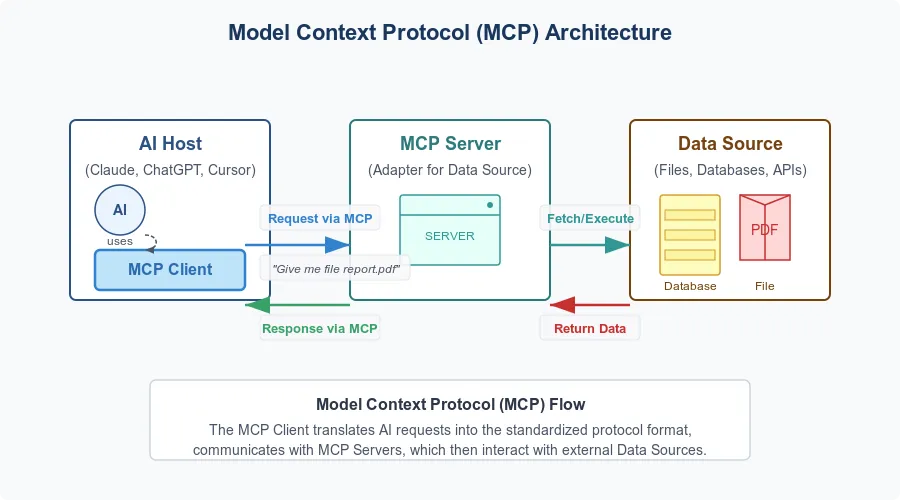

- **Resources:** These are data or content that the server can provide to the AI. If we compare MCP to web tech, a resource is like a GET endpoint – the AI requests it to load information. For example, a file server might expose a resource file://README.md to get the content of a README file.

- **Tools:** These are actions the AI can invoke via the server. This is like a POST endpoint – the AI provides input, and the server executes code or causes a side effect. Tools let the AI do things: run a calculation, modify data, send a message, etc.

- **Prompts:** These are reusable prompt templates or workflows that the server can supply. It's like the server giving the AI a pre-written prompt to help guide complex tasks.

- **Sampling:** An advanced feature where a server can request the AI to complete or transform text. It enables two-way communication: the AI can ask the server for data, and the server can ask the AI to analyze that data.

Let's use a kitchen analogy: Imagine an AI chef. A resource is like giving the chef an ingredient from the pantry (data it can use), a tool is like a kitchen appliance the chef can operate (actions it can take), and a prompt could be a recipe the chef can follow (a template for a process).

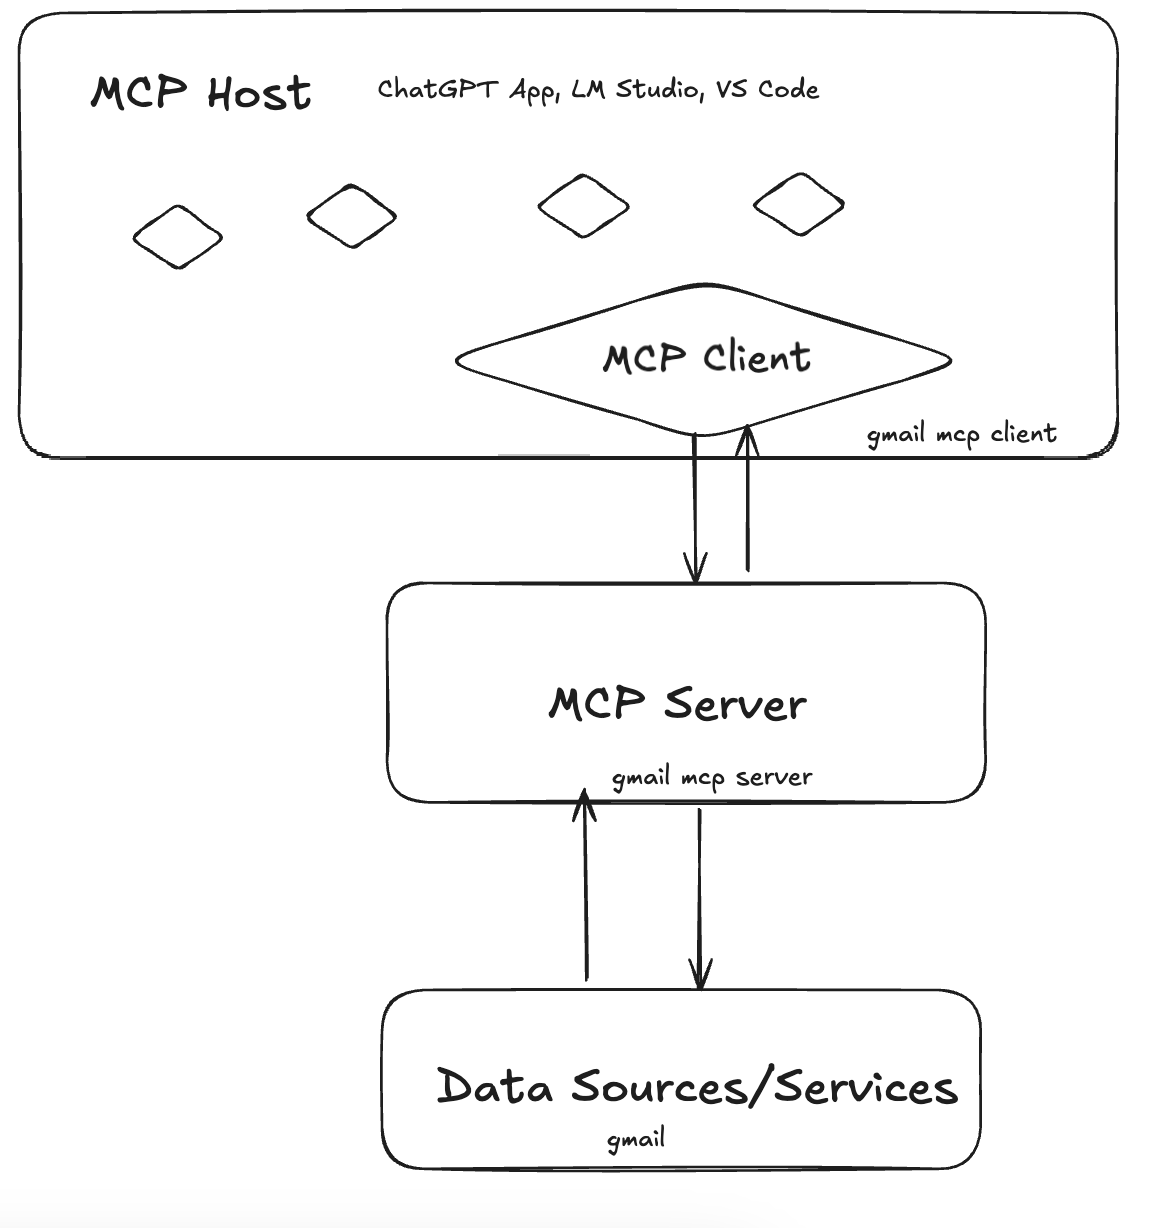

# How MCP Communicates
MCP is designed to be secure and flexible. Since MCP servers might have access to sensitive data or perform powerful actions, the protocol emphasizes security controls. Servers can implement access controls, and the AI host often requires user approval before executing a tool.

MCP can work over different "transports":

- STDIO Transport: The MCP server runs as a local process on the same machine as the host, and communication happens through standard input/output pipes. This mode is great for local development – it's simple and secure.

- SSE (HTTP) Transport: The MCP server runs as a web service (locally or remotely), exposing an HTTP endpoint. This mode is more flexible – your server could be running on a different machine or cloud instance.

Both transports do the same job; they just differ in how the bytes get from point A to B. Under the hood, the protocol uses structured messages (often JSON) to encode requests and responses

# IMPORTANT NOTE

Communication within MCP is changing.. It now uses JSON-RPC 2.0 over WebSocket connections, ensuring real-time, bidirectional communication between components.

# Integrating MCP Into Your Projects
Here are some tips for integrating MCP smoothly:

- **Leverage Existing Servers:** Before reinventing the wheel, check the official MCP examples and community repositories. There's a good chance someone has already built connectors for common tools.

- **Build Custom Servers:** If your data source is proprietary or very custom, building your own MCP server is straightforward. The SDKs (in Python, TypeScript, Java, C#, etc.) make this relatively easy. You focus on hooking up to your system, and the protocol details are handled by the library.

- **Host Servers Appropriately:** For small projects or local development, running servers on your machine is easiest. For larger setups or team use, you might deploy them on a server or cloud instance. Treat them like microservices.

- **Use MCP-Enabled AI Clients:** Your AI model or agent needs to support MCP to take advantage of these servers. Claude Desktop, Cursor IDE, and frameworks like LangChain all offer MCP support.

- **Test and Iterate:** As you add MCP to your project, continually test how the AI uses the new capabilities. Sometimes the AI will cleverly utilize a tool to solve a problem; other times it might need a nudge.

# Implementation

## Before We Start: Official MCP Server Examples

The MCP community maintains a collection of reference server implementations that showcase best practices and demonstrate various integration patterns. These official examples, available at [MCP Servers](https://github.com/modelcontextprotocol/servers/tree/main/src), provide valuable starting points for developers looking to create their own MCP servers.

### Setting Up Our Environment

#### Install uv Package Manager

```bash
# Run this in your terminal, not in Jupyter
curl -LsSf https://astral.sh/uv/install.sh | sh
```



#### Set up the Project

```bash
# Create and navigate to a project directory
mkdir mcp-crypto-server
cd mcp-crypto-server
uv init

# Create and activate virtual environment
uv venv
source .venv/bin/activate  # On Windows: .venv\Scripts\activate

# Install dependencies
uv add "mcp[cli]" httpx
```

### Running the MCP Server

Copy this into a file called `server.py`.

```python
"""
This script demonstrates how to create a simple MCP server that fetches
the current price of a cryptocurrency using the CoinGecko API.
It uses the FastMCP library to create the server and handle requests.
"""
import httpx
from dotenv import load_dotenv
from mcp.server.fastmcp import FastMCP

load_dotenv()

COINGECKO_BASE_URL = "https://api.coingecko.com/api/v3"

# Create our MCP server with a descriptive name
mcp = FastMCP("crypto_price_tracker")

# Now let's define our first tool - getting the current price of a cryptocurrency
@mcp.tool()
async def get_crypto_price(crypto_id: str, currency: str = "usd") -> str:
    """
    Get the current price of a cryptocurrency in a specified currency.
    
    Parameters:
    - crypto_id: The ID of the cryptocurrency (e.g., 'bitcoin', 'ethereum')
    - currency: The currency to display the price in (default: 'usd')
    
    Returns:
    - Current price information as a formatted string
    """
    # Construct the API URL
    url = f"{COINGECKO_BASE_URL}/simple/price"
    
    # Set up the query parameters
    params = {
        "ids": crypto_id,
        "vs_currencies": currency
    }
    
    try:
        # Make the API call
        async with httpx.AsyncClient() as client:
            response = await client.get(url, params=params)
            response.raise_for_status()  # Raise an exception for HTTP errors
            
            # Parse the response
            data = response.json()
            
            # Check if we got data for the requested crypto
            if crypto_id not in data:
                return f"Cryptocurrency '{crypto_id}' not found. Please check the ID and try again."
            
            # Format and return the price information
            price = data[crypto_id][currency]
            return f"The current price of {crypto_id} is {price} {currency.upper()}"
            
    except httpx.HTTPStatusError as e:
        return f"API Error: {e.response.status_code} - {e.response.text}"
    except Exception as e:
        return f"Error fetching price data: {str(e)}"

# You can add more tools here, following the same pattern as above

# Run the MCP server
# This will start the server and listen for incoming requests
if __name__ == "__main__":
    mcp.run()
```

```bash
# Start the MCP server in your terminal
uv run server.py
```

### Integration with Claude Desktop

Download link: https://claude.ai/download

#### Find the absolute path to your uv command

```bash
which uv
# which python3.x
```

#### Create or edit the Claude Desktop configuration file
- On macOS: `~/Library/Application Support/Claude/claude_desktop_config.json`

- On Linux: `~/.config/Claude/claude_desktop_config.json`

- On Windows (please check - I was not able to confirm): `%APPDATA%\Claude\claude_desktop_config.json`

#### Add your MCP server configuration to Claude Desktop

```json
{
    "mcpServers": {
        "crypto-price-tracker": {
            "command": "/ABSOLUTE/PATH/TO/uv",
            "args": [
                "--directory",
                "/ABSOLUTE/PATH/TO/FOLDER/YOU/CREATED/mcp-crypto-server",
                "run",
                "server.py"
            ]
        }
    }
}
```

#### Restart Your Claude Desktop

You should see this hammer in your chat box.

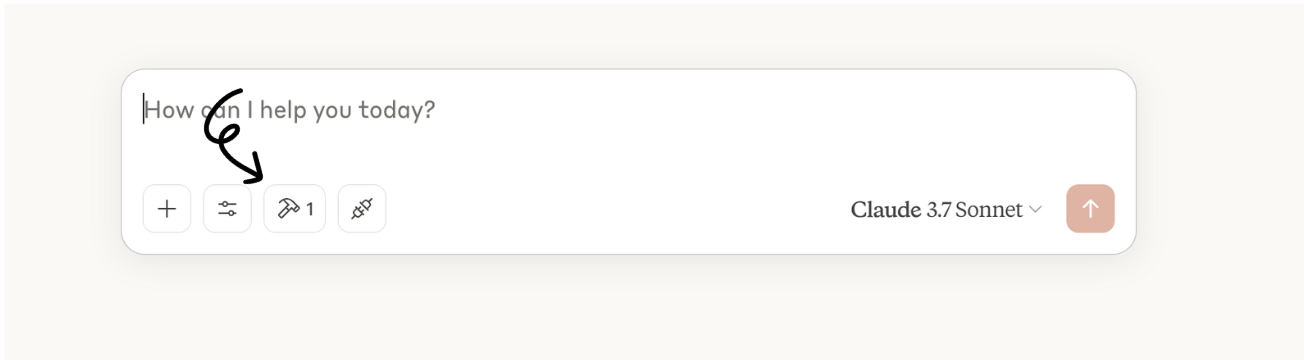

#### Now, experiment with the tool

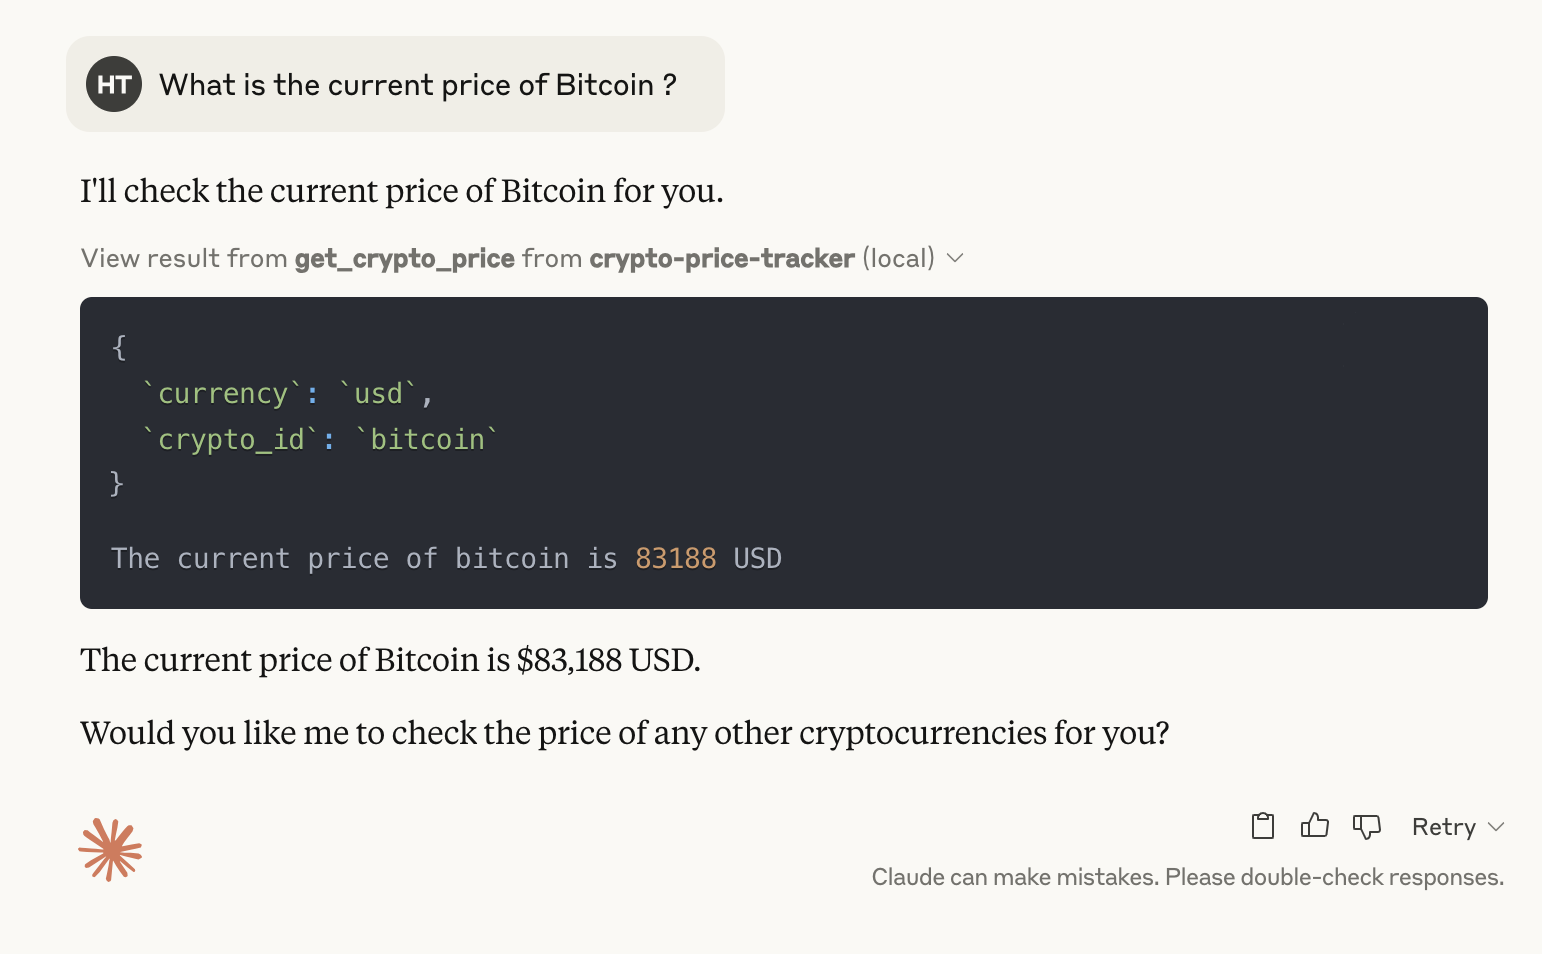

Congrats! You've successfully applied your MCP server and tool.